In [98]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [99]:
#importing the dataset
kMeansClust = pd.read_csv('C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/K-Means clustering/kMeansClustDataset.csv')

#checking the data
kMeansClust.head(10)

,Country,Time,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Electric power consumption (kWh per capita),"Labor force, female (% of total labor force)","Labor force, total","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)"
0,Albania,2021,83.60,100.0,100.0,100.0,2509.899825,45.035146,1367734.0,16.891769,90.168068,93.605759,15.200549,16.925593,97.542336,98.118729,19.472927
1,Albania,2022,84.60,100.0,100.0,100.0,2507.480139,44.983812,1389262.0,18.238667,90.499878,93.857521,44.209438,42.482748,97.387100,98.340546,21.360638
2,Albania,2023,41.00,100.0,100.0,100.0,2792.953671,44.994454,1376643.0,11.603081,73.928682,89.258541,17.216039,16.514433,88.957954,97.059845,12.366823
3,Argentina,2021,99.90,100.0,100.0,100.0,2942.910775,42.404131,20993886.0,25.140117,94.497227,95.857971,42.231333,39.541065,97.608189,98.721432,28.560231
4,Argentina,2022,99.90,100.0,100.0,100.0,2833.119098,42.940262,21566906.0,32.079149,91.287685,92.470154,48.442259,41.600052,98.226749,98.600445,39.087786
5,Argentina,2023,99.95,100.0,100.0,100.0,9887.387658,43.247981,22069879.0,25.970497,96.160347,96.299831,45.666615,35.224498,98.930634,99.476025,34.744554
6,Armenia,2021,98.00,100.0,100.0,99.9,2262.093643,50.931288,1495617.0,27.701738,98.980995,99.335953,56.830097,50.918709,99.741417,99.801941,29.258392
7,Armenia,2022,97.90,100.0,100.0,100.0,2403.677758,50.342284,1480203.0,27.896791,99.124702,99.266632,55.466942,50.279350,99.777977,99.697197,28.606476
8,Armenia,2023,41.00,100.0,100.0,100.0,3804.004576,50.304781,1492711.0,11.603081,73.928682,89.258541,17.216039,16.514433,88.957954,97.059845,12.366823
9,Australia,2021,100.00,100.0,100.0,100.0,9848.547495,47.174929,13821829.0,32.990002,94.519997,94.580002,56.459999,48.110001,99.680038,100.000000,38.799999


In [100]:
#dropping the columns that are not needed for clustering
kMeansClust.drop(['Country', 'Time'], axis=1, inplace=True)

In [101]:
#scale the data
scaler = StandardScaler()
kMeansClustScaled = scaler.fit_transform(kMeansClust)

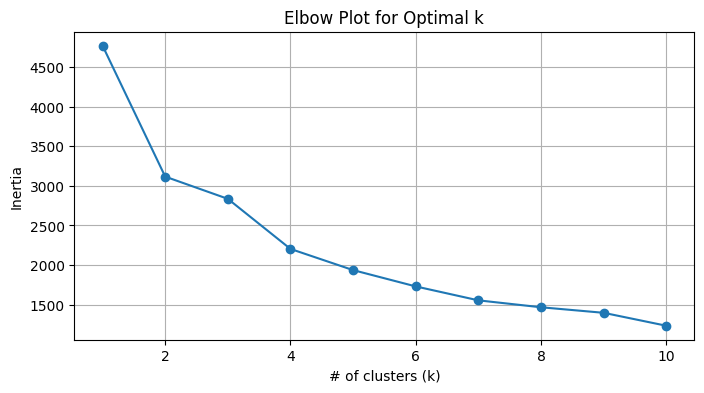

In [ ]:
#Convert scaled data back to a DataFrame
inertia = []
kRange = range(1, 11)

for k in kRange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kMeansClustScaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(kRange, inertia, marker='o')
plt.xlabel('# of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()

In [103]:
#Choose an optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kMeansClust['Cluster'] = kmeans.fit_predict(kMeansClustScaled)

In [104]:
#add country and time to the dataset
kMeansClust['Country'] = pd.read_csv('C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/K-Means clustering/kMeansClustDataset.csv')['Country']
kMeansClust['Time'] = pd.read_csv('C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/K-Means clustering/kMeansClustDataset.csv')['Time']
kMeansClust['Country'] = kMeansClust['Country'].astype(str)
kMeansClust['Time'] = kMeansClust['Time'].astype(str)

kMeansClust.head(10)

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Electric power consumption (kWh per capita),"Labor force, female (% of total labor force)","Labor force, total","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",Cluster,Country,Time
0,83.60,100.0,100.0,100.0,2509.899825,45.035146,1367734.0,16.891769,90.168068,93.605759,15.200549,16.925593,97.542336,98.118729,19.472927,1,Albania,2021
1,84.60,100.0,100.0,100.0,2507.480139,44.983812,1389262.0,18.238667,90.499878,93.857521,44.209438,42.482748,97.387100,98.340546,21.360638,1,Albania,2022
2,41.00,100.0,100.0,100.0,2792.953671,44.994454,1376643.0,11.603081,73.928682,89.258541,17.216039,16.514433,88.957954,97.059845,12.366823,0,Albania,2023
3,99.90,100.0,100.0,100.0,2942.910775,42.404131,20993886.0,25.140117,94.497227,95.857971,42.231333,39.541065,97.608189,98.721432,28.560231,1,Argentina,2021
4,99.90,100.0,100.0,100.0,2833.119098,42.940262,21566906.0,32.079149,91.287685,92.470154,48.442259,41.600052,98.226749,98.600445,39.087786,1,Argentina,2022
5,99.95,100.0,100.0,100.0,9887.387658,43.247981,22069879.0,25.970497,96.160347,96.299831,45.666615,35.224498,98.930634,99.476025,34.744554,1,Argentina,2023
6,98.00,100.0,100.0,99.9,2262.093643,50.931288,1495617.0,27.701738,98.980995,99.335953,56.830097,50.918709,99.741417,99.801941,29.258392,1,Armenia,2021
7,97.90,100.0,100.0,100.0,2403.677758,50.342284,1480203.0,27.896791,99.124702,99.266632,55.466942,50.279350,99.777977,99.697197,28.606476,1,Armenia,2022
8,41.00,100.0,100.0,100.0,3804.004576,50.304781,1492711.0,11.603081,73.928682,89.258541,17.216039,16.514433,88.957954,97.059845,12.366823,0,Armenia,2023
9,100.00,100.0,100.0,100.0,9848.547495,47.174929,13821829.0,32.990002,94.519997,94.580002,56.459999,48.110001,99.680038,100.000000,38.799999,1,Australia,2021


C:\Users\denis\AppData\Local\Temp\ipykernel_28684\2226451795.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10Countries = (kMeansClustUnique.groupby('Cluster').apply(lambda group: group.head(10)).reset_index(drop=True))


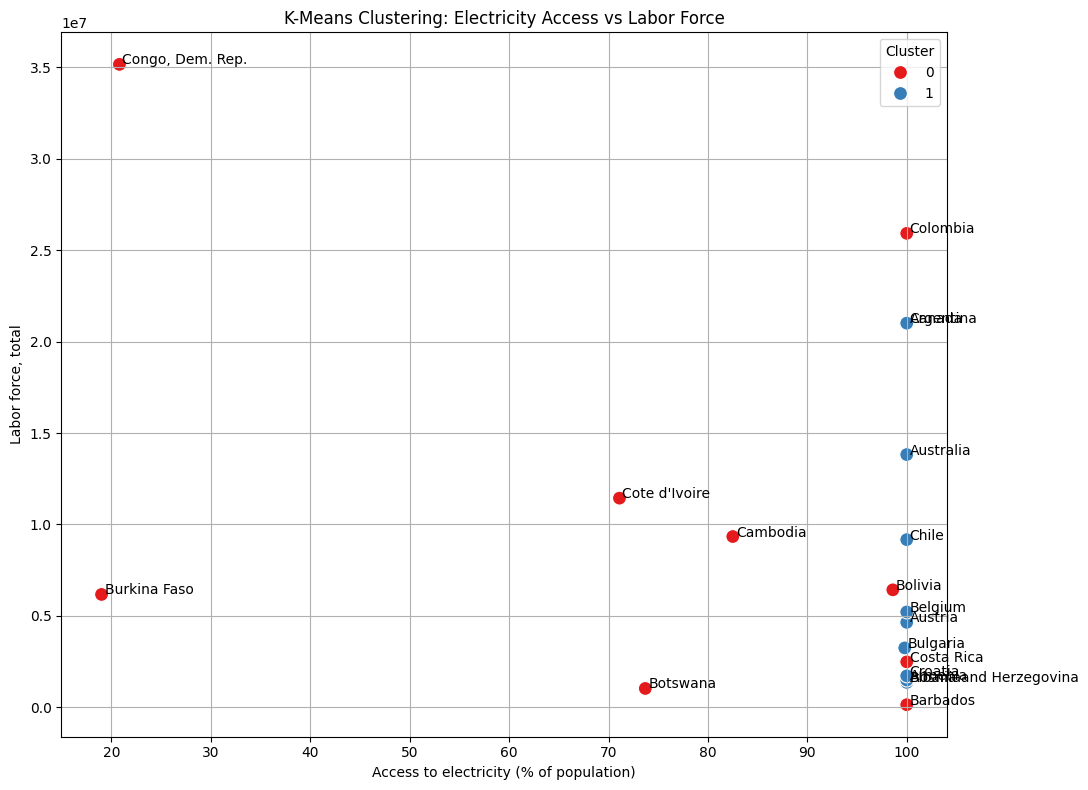

In [115]:
xVar = 'Access to electricity (% of population)' 
yVar = 'Labor force, total'

# Remove duplicate countries and excluding Outliers
kMeansClustUnique = kMeansClust.drop_duplicates(subset='Country')
kMeansClustUnique = kMeansClustUnique[kMeansClustUnique['Country'] != 'Bangladesh']
kMeansClustUnique = kMeansClustUnique[kMeansClustUnique['Country'] != 'Brazil']
kMeansClustUnique = kMeansClustUnique[kMeansClustUnique['Country'] != 'China']

# Select first 10 unique countries per cluster
top10Countries = (kMeansClustUnique.groupby('Cluster').apply(lambda group: group.head(10)).reset_index(drop=True))

plt.figure(figsize=(11, 8))

# Plot only the selected top 10 countries per cluster
sns.scatterplot(data=top10Countries, x=xVar, y=yVar, hue='Cluster', palette='Set1', s=100)

# Add labels for the plotted countries
for _, row in top10Countries.iterrows():plt.text(x=row[xVar] + 0.3, y=row[yVar] + 0.3, s=row['Country'], fontsize=10)

# Final plot formatting
plt.title("K-Means Clustering: Electricity Access vs Labor Force")
plt.xlabel(xVar)
plt.ylabel(yVar)
plt.grid(True)
plt.tight_layout()
plt.show()